Import packages: numpy and necessary classes and modules from rainbow
 

In [1]:
import numpy as np

from rainbow import EmissionLine, EmissionLineSet, Spaxel
import rainbow.plot
import rainbow.fit
import rainbow.read
import rainbow.write

/home/smirnova/aida40143/programs/rainbow/rainbow/fit.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdm


Define _EmissionLineSet_ manually by adding the lines with fluxes and errors.

In [2]:
sf_basis_emission_lines = np.loadtxt('R.txt', skiprows=1)
sf_basis_halpha_flux = sf_basis_emission_lines[:, 0]
sf_basis_hbeta_flux = sf_basis_emission_lines[:, 1]
sf_basis_oiii_flux = sf_basis_emission_lines[:, 2]
sf_basis_nii_flux = sf_basis_emission_lines[:, 3]
sf_basis_halpha_error = sf_basis_emission_lines[:, 4]
sf_basis_hbeta_error = sf_basis_emission_lines[:, 5]
sf_basis_oiii_error = sf_basis_emission_lines[:, 6]
sf_basis_nii_error = sf_basis_emission_lines[:, 7]

sf_basis = EmissionLineSet()
sf_basis.add_line(EmissionLine(name='Halpha', flux=sf_basis_halpha_flux, error=sf_basis_halpha_error))
sf_basis.add_line(EmissionLine(name='Hbeta', flux=sf_basis_hbeta_flux, error=sf_basis_hbeta_error))
sf_basis.add_line(EmissionLine(name='OIII5007', flux=sf_basis_oiii_flux, error=sf_basis_oiii_error))
sf_basis.add_line(EmissionLine(name='NII6583', flux=sf_basis_nii_flux, error=sf_basis_nii_error))
sf_basis.set_bpt_info()

Define _EmissionLineSet_ from the FITS table using _rainbow.read_.

In [3]:
emission_line_set = rainbow.read.fits_table('AINBOW.fits', ['Halpha', 'Hbeta', 'OIII5007', 'NII6583'])
emission_line_set.set_bpt_info()

.subset(index) defines a new _EmissionLineSet_ with the given indexes; the `inverse` argument creats _EmissionLineSet_
excluding the given indexes. This is how the `agn_basis` is separated here from the rest of the "mixing sequence"

In [4]:
agn_basis_index = np.where(np.log10(emission_line_set.BPT['OIII5007/Hbeta']) > 0.75)[0]
agn_basis = emission_line_set.subset(agn_basis_index)
to_fit = emission_line_set.subset(agn_basis_index, inverse=True)

Plotting with `rainbow.plot` is easy:
try `rainbow.plot.bpt(emission_line_set)` to visualize the FITS table data.
To be able to overplot other data with different colors turn off the `show` option in all but the last `plot.bpt`
and overplot with `size=0` argument so the new figure is not created:

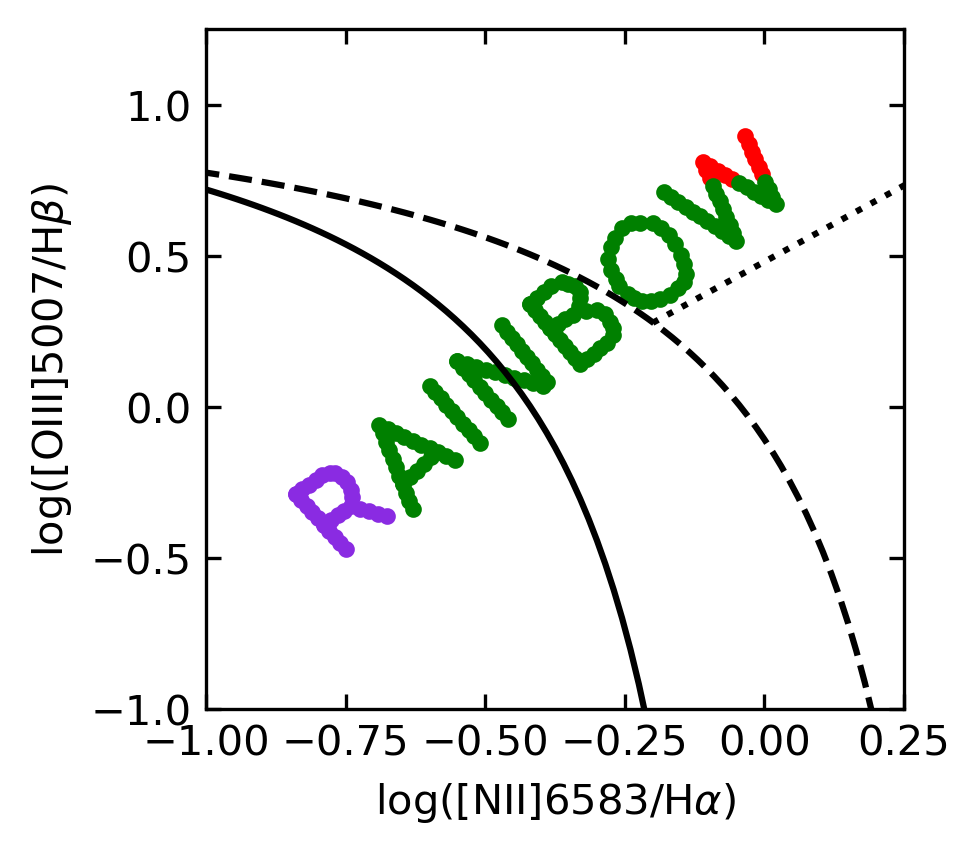

In [5]:
rainbow.plot.bpt(agn_basis, color='red', show=0)
rainbow.plot.bpt(sf_basis, color='blueviolet', size=0, show=0)
rainbow.plot.bpt(to_fit, color='green', size=0)

`rainbow.fit` requires the three arguments, which are either _EmissionLineSet_ or _Spaxel_ class instances
and returns the copy of `to_fit` but with the fitted SF fractions (and the corresponding errors).

In [6]:
fitted = rainbow.fit(to_fit, agn_basis, sf_basis)

Plotting the result colorcoded by the fitted SF fraction

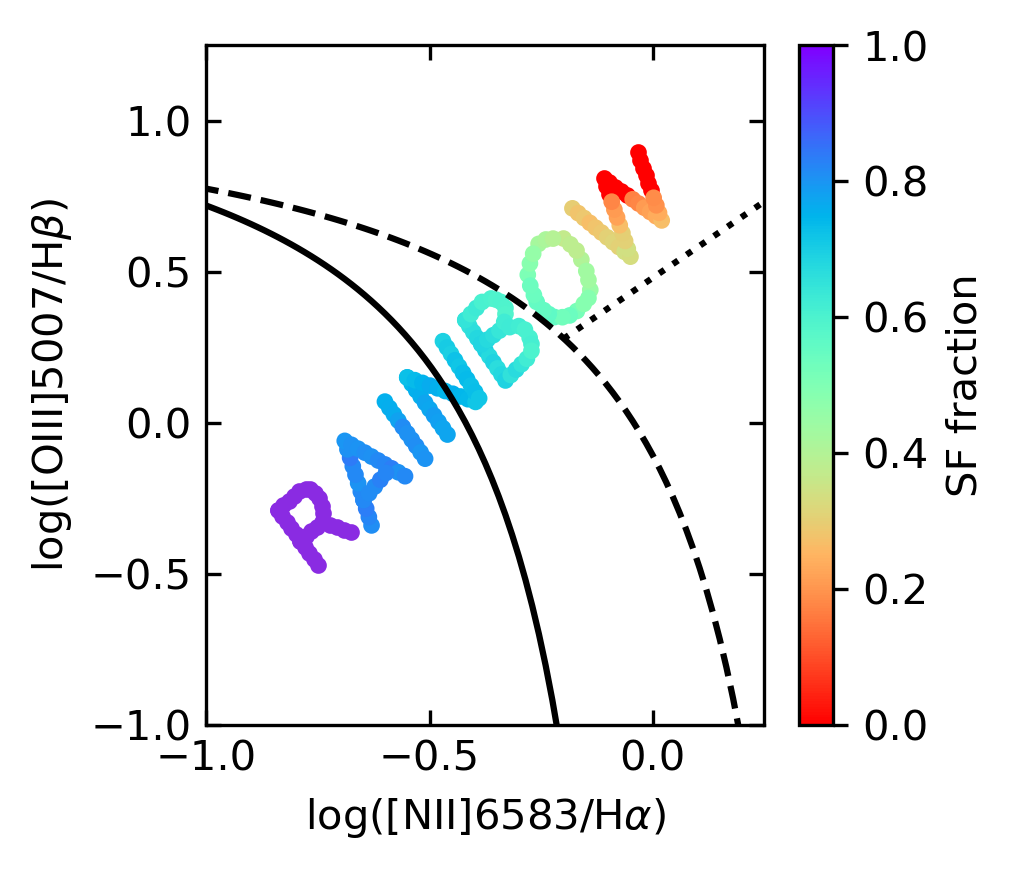

In [7]:
rainbow.plot.bpt(agn_basis, color='red', show=0)
rainbow.plot.bpt(sf_basis, color='blueviolet', size=0, show=0)
rainbow.plot.bpt(fitted, colorcode=fitted.sf_fraction,
                 cmap='rainbow_r', clim=(0., 1.),
                 clb=1, clb_label='SF fraction',
                 vmin=0., vmax=1.,
                 size=0
                 )
